In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def iterate_r(func, x_0, r, prep_times, plot_times):
    """
    Iterate the logistic function with initial value x_0 for r = r
    x_1 = func(x_0,r), etc.

    func shall have signature func(x, r) -> x, simliar to logistic function

    x_0 to x_{prep_times-1} are ignored.
    x_{prep_times} to x_{prep_times+plot_times-1} are recorded in res
    and returned
    """
    val = x_0
    for _ in range(prep_times):
        val = func(val, r)

    res = []
    # ignore x_500, recording values from x_501
    for _ in range(plot_times):
        val = func(val, r)
        res.append(val)

    return res


def d_sqrt(x, r):
    if x > 1/2:
        return r*np.sqrt(-2*(x-1))
    else:
        return r*np.sqrt(2*x)

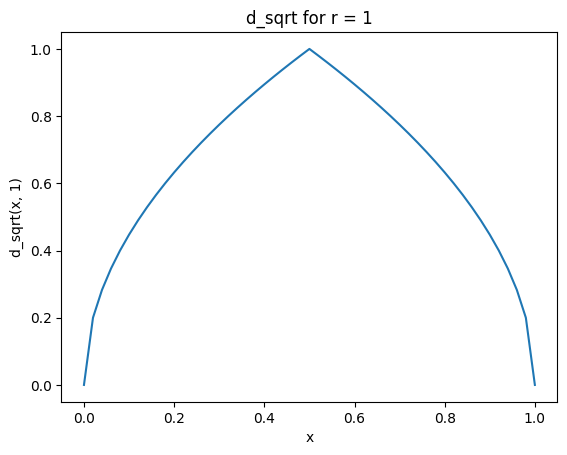

In [15]:
# graph d_sqrt for r = 1, x in [0,1]
x = np.linspace(0, 1, 51)
y = [d_sqrt(val, 1) for val in x]
plt.title("d_sqrt for r = 1")
plt.xlabel("x")
plt.ylabel("d_sqrt(x, 1)")
plt.plot(x, y)
plt.show()

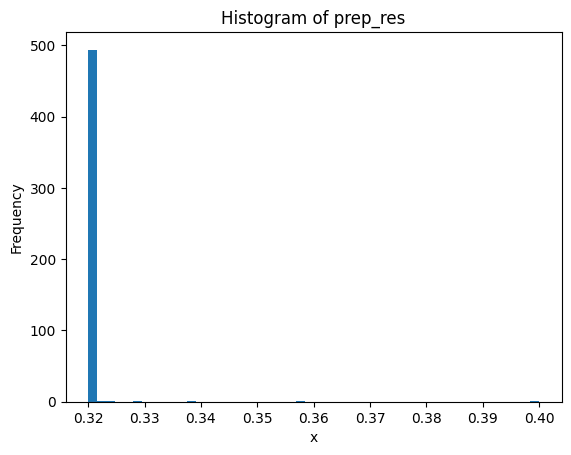

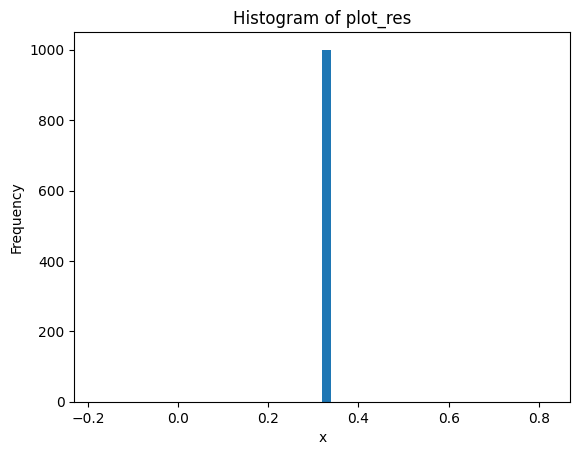

In [20]:
r = 0.4
x_0 = 0.5
prep_times = 500
plot_times = 1000 
prep_res = []
plot_res = []
for i in range(prep_times):
    x_0 = d_sqrt(x_0, r)
    prep_res.append(x_0)
for i in range(plot_times):
    x_0 = d_sqrt(x_0, r)
    plot_res.append(x_0)

# plot histogram of prep_res
plt.title("Histogram of prep_res")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.hist(prep_res, bins=50)
plt.show()

# plot histogram of plot_res
plt.title("Histogram of plot_res")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.hist(plot_res, bins=50)
plt.show()


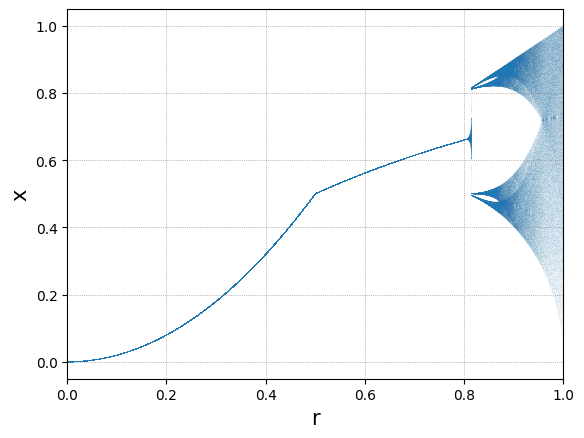

In [40]:

#################
# Global variables
#################

# Lower bound of r
r_low = 0
# Upper bound of r
r_high = 1
n_of_r = 2500  # Number of r values to try

# init x
x_0 = 0.6

prep_times = 200  # Number of iterations to ignore
plot_times = 800  # Number of iterations to plot

# Start of plotting

marker_style = dict(linestyle=':', color='b',
                    markersize=0.01, fillstyle='full')

fig, ax = plt.subplots()
plt.grid(color='gray', linestyle=':', linewidth=0.5)

r_vals = np.linspace(r_low, r_high, n_of_r)

for r in r_vals:
    # variable line size as for r <3.5 there are very few paths
    l_size = 0.05
    if r < 0.8:  # before 3.5 the system is rather stable
        x = iterate_r(d_sqrt, x_0, r, prep_times, 200)
        l_size = 0.1
    else:
        x = iterate_r(d_sqrt, x_0, r, prep_times, plot_times)
        l_size = 0.05

    # plt.plot([r]*len(x), x, ',b')
    r_dummy = np.linspace(r, r, len(x))
    ax.scatter(r_dummy, x, c='tab:blue', s=l_size,
               alpha=0.3, edgecolors='none', facecolors='tab:blue',
               marker='o')

# ax.plot(r_vals, 1 - 1/r_vals, color='r',
#         linestyle='--', linewidth=0.8, alpha=0.5)

# Custom legend
# legend_elements = [
#     Line2D([0], [0], color='r', linestyle='--', linewidth=0.8, label='1-1/r'),
#     Line2D([0], [0], marker='o', color='w', label='x values',
#            markerfacecolor='b', markersize=3),
# ]
# ax.legend(handles=legend_elements, loc='upper left', fontsize=10)


plt.xlabel('r', fontsize=15)
plt.ylabel('x', fontsize=15)

plt.xlim(r_low, r_high)
plt.savefig('d_sqrt.png', dpi=300)
plt.show()
